**LIFE CYCLE OF A DATA SCIENCE PROJECT**


1.   Data Collection - should be collected from multiple resources like from company side, 3rd party APIs, Surveys.
2.   Feature Engineering :
    
    => Handling missing values
        
        1) Continous data, ex = height 172.5

        2) Discrete data, ex = number of children = 4

        3) Categorical data
    
    => Encoding Categorical features

3.  Feature Scaling :

    => Standardization of data. (0 mean, 1 SD)

    => Normalization of data. (0 to 1)

4. Feature Selection.

5. Hyper Parameter Tuning.

6. Cross Validation.

7. Model Selection.

8. Deployement


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import pickle
import xgboost

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [2]:
df = pd.read_csv('/content/heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

**FEATURE ENGINEERING**

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
train_df = df.iloc[:, :-1]
y = df['target'].ravel()

train_df.shape, y.shape

((303, 13), (303,))

### Different Types of Missing data :-

1) Missing Completely at Random (MCAR): No relationship between the missing data and any other values within the dataset.

2) Missing Not at Random (MNAR) : the opposite, i.e. systematic missing values.

3) Missing at Random (MAR)

### All techniques to handle Missing data :-

1) Mean/Median/Mode replacement :-

2) Random Sample Imputation

3) Capturing NaN values with a new feature

4) End of distribution Imputation

5) Arbitrirary Imputation

6) Frequent Categories Imputation

### We will be working on Titanic Dataset as it has many missing values.

In [3]:
titanic_df = pd.read_csv('/content/train.csv')

print(titanic_df.shape)

titanic_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
titanic_df.isnull().sum()

# Here, Age and Cabin has something in common, so it's MNAR, but Embarked has no relationship, so it's MCAR.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [4]:
titanic_df['cabin_null'] = np.where(titanic_df['Cabin'].isnull(), 1, 0)

titanic_df['cabin_null'].mean() # percentage of null values

0.7710437710437711

In [36]:
titanic_df.groupby(['Survived'])['cabin_null'].mean()

# This means that 60% of the people survived whose cabin was not NaN and 87% of the people not survived
# whose cabin was NaN.

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

1) Mean/Median/Mode Replacement

    When data is missing at completely random (MCAR) - replace   NaN with the most frequent occurance of the variables.

    Advantages :=
    1) Easy to implement
    2) Robust to outliers
    3) Faster way to obtain complete dataset
    Disadvantages :=
    1) Change or distortion in original variance
    2) Impacts correlation

In [6]:
print(titanic_df['Age'].isnull().mean())

def median_imputation(df, var, median):
    df[var+'_median'] = df[var].fillna(median)

median = titanic_df['Age'].median()

median_imputation(titanic_df, 'Age', median)

titanic_df['Age_median'].isnull().mean()

0.19865319865319866


0.0

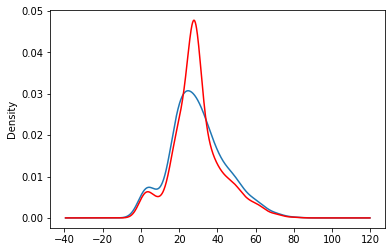

In [42]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
titanic_df['Age'].plot(kind='kde', ax=ax) 
titanic_df['Age_median'].plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()

2) Random Sample Imputation

    It consists of taking random observations from the dataset and we use this observation to replace the NaN values

    When it should be used?
    It assumes that the data is missing completely at random i.e. MCAR again.

    Advantages :=
    1) Easy to implement
    2) There is less distortion in variance
    Disadvantes :=
    1) Every situtation randomness won't work

In [7]:
def random_sample_imputation(df, var):
    df[var+'_random'] = df[var]
    random_sample = df[var].dropna().sample(df[var].isnull().sum(), random_state=0)
    random_sample.index = titanic_df[titanic_df[var].isnull()].index
    df.loc[df[var].isnull(), var+'_random'] = random_sample

random_sample_imputation(titanic_df, 'Age')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0


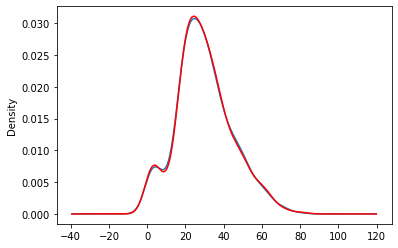

In [12]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
titanic_df['Age'].plot(kind='kde', ax=ax) 
titanic_df['Age_random'].plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()

3) Capturing NaN values with a new feature

    It works well if the data is not missing at random i.e. MNAR

    Advantages :=
    1) Easy to implement
    2) Captures the importance of missing values
    Disadvantages :=
    1) Creating additional features for every NaN'd column which can lead to Curse of Dimensionality

In [13]:
def impute_nan(df, var):
    df[var+'_NaN'] = np.where(df[var].isnull(), 1, 0)

impute_nan(titanic_df, 'Age')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random,Age_NaN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0,0


4) End of distribution Imputation

    Advantages :=
    1) Easy to implement
    2) Captures the importance of missingness if there is one
    Disadvantages :=
    1) Distorts the original dist of the variable
    2) If missingness is not important, it may mask the predictive power of the original variable by distorting its dist
    3) If the number of NA is big, it will mask true outliers in the dist
    4) If the number of NA is small, the replaced NA maybe considered an outlier and pre-processed in a subsequent feature engineering technique

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


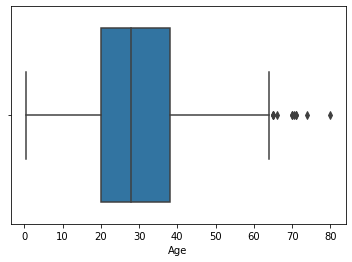

In [16]:
# To look for outliers :-
sns.boxplot('Age', data=titanic_df)

In [19]:
def impute_end_nan(df, var, extreme_val):
    df[var+'_end_dist'] = df[var].fillna(extreme_val)
    df[var].fillna(df[var].median(), inplace=True)

extreme_val = titanic_df['Age'].mean() + 3*titanic_df['Age'].std() # taking the 3rd STD

impute_end_nan(titanic_df, 'Age', extreme_val)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random,Age_NaN,Age_end_dist
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0,0,35.0


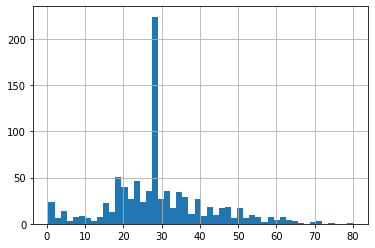

In [20]:
titanic_df['Age'].hist(bins=50)

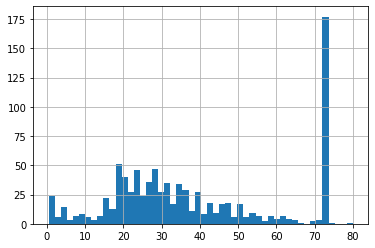

In [22]:
titanic_df['Age_end_dist'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


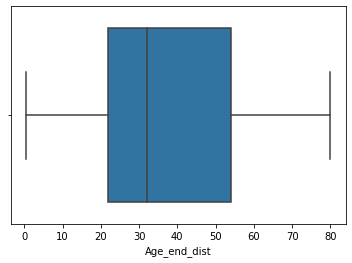

In [23]:
sns.boxplot('Age_end_dist', data=titanic_df)

# voila ! no outliers

5) Arbitrary Imputation

    This technique was derived from a Kaggle Competition.
    It consists of replacing NaN by arbitrary value.
    It should not be more frequently present.

    Advantages :=
    1) Easy to implement
    2) Captures the importance of missingness if there is one
    Disadvantages :=
    1) Distorts the original dist of the variable
    2) If missingness is not imp, it may mask the predictivie power of the orignal var by distortion.
    3) Hard to decide which value to use.

In [8]:
def impute_arbitrary(df, var):
    df[var+'_arbitrary'] = df[var].fillna(100)

### Handling Missing Categorical Features

In [10]:
df = pd.read_csv("/content/house_price.csv", usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [18]:
df.isnull().sum().sort_values(ascending=True)

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

####1) Frequent Category Imputation

    It is used when the missing values are less

    Advantages :=
    1) Easy to implement
    2) Faster way to implement
    Disadvantage :=
    1) Since we are using the more freq labels, it may use them in an over-represented way if there are many NaNs.
    2) It distorts the relation of the most freq label.

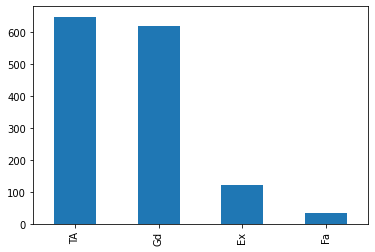

In [22]:
df['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()

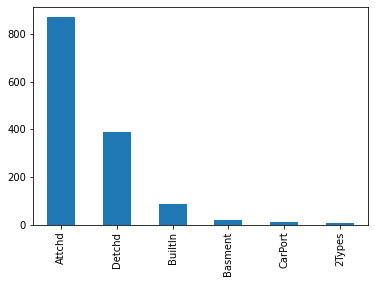

In [23]:
df['GarageType'].value_counts().sort_values(ascending=False).plot.bar()

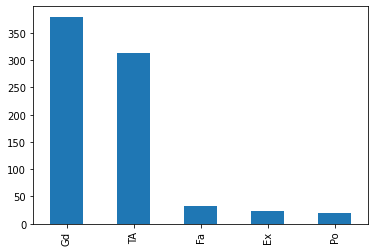

In [24]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()

In [33]:
def impute_freq_nan(df, var):
    highest_freq_cat = df[var].value_counts().sort_values(ascending=False).index[0]
    df[var].fillna(highest_freq_cat, inplace=True)

impute_freq_nan(df, 'BsmtQual')

df['BsmtQual'].isnull().sum()

0

####2) Adding a variable to capture NaN

        Disadvantages :=
        1) It adds a new feature for every feature in which there are NaNs

In [40]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(), 1, 0)

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var
0,Gd,NaN,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [32]:
freq_val = df['FireplaceQu'].mode()[0] # or df[var].value_counts().sort_values(ascending=False).index[0]
df['FireplaceQu'].fillna(freq_val)

0       Gd
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    Gd
1459    Gd
Name: FireplaceQu, Length: 1460, dtype: object

####3) Replacing NaN with a new category (Most Used)

        It is used when we have more frequent categories.

In [41]:
def impute_nan_with_new(df, var):
    df[var+'_new'] = np.where(df[var].isnull(), 'Missing', df[var])

impute_nan_with_new(df, 'GarageType')

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var,GarageType_new
0,Gd,NaN,Attchd,208500,1,Attchd
1,Gd,TA,Attchd,181500,0,Attchd
2,Gd,TA,Attchd,223500,0,Attchd
3,TA,Gd,Detchd,140000,0,Detchd
4,Gd,TA,Attchd,250000,0,Attchd


###Handling/Encoding Categorical Features

####1) One Hot Encoding

        It is used when we have very less categorical features.

        Disadvantages :=
        1) If we have N categories in a features, it will create N-1 additional features

In [43]:
df1 = pd.read_csv("/content/train.csv", usecols=['Sex'])

df1.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [45]:
df1.isnull().sum()

Sex    0
dtype: int64

In [47]:
pd.get_dummies(df1, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [48]:
df2 = pd.read_csv("/content/train.csv", usecols=['Embarked'])
df2.value_counts()

Embarked
S           644
C           168
Q            77
dtype: int64

In [49]:
pd.get_dummies(df2, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


####2) One Hot Encoding with many categorical features

In [51]:
df3 = pd.read_csv("/content/mercedes.csv", usecols=['X0','X1','X2','X3','X4','X5','X6'])
df3.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [60]:
df3['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [61]:
df3['X0'].value_counts().sort_values(ascending=False).head(10) # taking the Top 10 categories of feature X0

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [62]:
top_10 = df3['X0'].value_counts().sort_values(ascending=False).head(10).index
top_10 = list(top_10)
top_10

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [69]:
# Apply one hot encoding to these Top 10 features
for cats in top_10:
    df3[cats] = np.where(df3['X0'] == cats, 1, 0)

# Now we can drop 'X0' in replacement with these top 10 features, simimlarly do this for the remaining cat features X1...

####3) Ordinal Number Encoding

        Here we assign ranks (Grading System).

In [ ]:
rankings = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df4['ranked_feature'] = df4['weekday'].map(rankings)

####4) Count or Frequency Encoding

        Advantages :=
        1) Easy to use.
        2) Not increasing any feature space.
        Disadvantage :=
        1) It will provide same weight if the frequencies are same.

In [ ]:
# for example :

country_map = df4['Country'].value_counts().to_dict()

country_map = {
    'USA': 10000,
    'India': 2000,
    'Australia': 150,
    'China': 10,
    'Japan': 100,
    'Russia': 500
}

df4['Country'] = df4['Country'].map(country_map)

####5) Target guided ordinal encoding

        -> We will be ordering the labels according to the target.
        -> We may replace the labels by the joint probability of being 1 and 0.

In [22]:
df5 = pd.read_csv("/content/titanic.csv", usecols=['Cabin', 'Survived'])
df5.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [24]:
df5['Cabin'].fillna('Missing', inplace=True)

In [25]:
df5['Cabin'] = df5['Cabin'].astype(str).str[0]

In [8]:
df5.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [9]:
df5['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [14]:
df5.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [10]:
ordinal_labels = df5.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [17]:
ordinal_labels_mapping = {v:i for i,v in enumerate(ordinal_labels)}
ordinal_labels_mapping

{'A': 2, 'B': 6, 'C': 4, 'D': 8, 'E': 7, 'F': 5, 'G': 3, 'M': 1, 'T': 0}

In [18]:
df5['Cabin_ordinal'] = df5['Cabin'].map(ordinal_labels_mapping)
df5.head()

,Survived,Cabin,Cabin_ordinal
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


In [19]:
df5.drop(['Cabin'], axis=1, inplace=True)

####6) Mean Encoding

In [27]:
mean_ordinal_map = df5.groupby(['Cabin'])['Survived'].mean().to_dict()
mean_ordinal_map

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [28]:
df5['mean_cabin'] = df5['Cabin'].map(mean_ordinal_map)
df5.head()

,Survived,Cabin,mean_cabin
0,0,M,0.299854
1,1,C,0.593220
2,1,M,0.299854
3,1,C,0.593220
4,0,M,0.299854


####ALL STANDARDIZATION, NORMALIZATION AND TRANSFORMATION TECHNIQUES

    These techniques are required because it helps the algorithm to reach global minima easily by 
    scaling down the values to similar range.
    Some of the ML Algorithms uses Standardization and Normalization like LR, NNs, SVM, KNN etc but not all like DT, RF, Xgboost.

    Techinques :=
    1) Normalization and Standardization.
    2) Scaling to Minimum and Maximum values.
    3) Scaling to Median and Quantiles.
    Transformations :=
    Gaussian Transformation
    1) Logarithmic Transformation
    2) Reciprocal Transformation
    3) Square Root Transformation
    4) Exponential Transformation
    5) Box Cox Transformation
    

In [2]:
df = pd.read_csv("/content/titanic.csv", usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [4]:
df.isnull().sum() 

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [ ]:
X = df.iloc[:, 1:]
y = df['Survived']

####1) Standardization (Works well with ML Algorithms)
    This means centering the variable at zero. (mean=0, SD=1)
    Z = (X-X_mean)/SD. (It applies on each Feature not row)

In [6]:
from sklearn.preprocessing import StandardScaler

In [29]:
scalar = StandardScaler()
df_scaled = scalar.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)
df_scaled.head()

,Pclass,Age,Fare
0,0.827377,-0.565736,-0.502445
1,-1.566107,0.663861,0.786845
2,0.827377,-0.258337,-0.488854
3,-1.566107,0.433312,0.420730
4,0.827377,0.433312,-0.486337


####2) Normalization (Works well with DNNs)
    It scales the values between 0 to 1.
    X_scaled = (X-X_min)/(X_max-X_min)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
minMax = MinMaxScaler()
df_minMax = minMax.fit_transform(X)
df_minMax = pd.DataFrame(df_minMax, columns=X.columns)
df_minMax.head()

,Pclass,Age,Fare
0,1.0,0.271174,0.014151
1,0.0,0.472229,0.139136
2,1.0,0.321438,0.015469
3,0.0,0.434531,0.103644
4,1.0,0.434531,0.015713


####3) Robust Scaler
    Used to scale the features to Median and Quantiles.
    Scaling using median and quantiles consists of substracting the median to all the observations
    and then dividing by the interquantile difference. 
    The interquantile difference is the difference between the 75th and 25th quantile.

    It is robust to outliers.

    IQR = 75th quantile - 25th quantile
    X_scaled = (X-X_median)/IQR

    For ex: 0,1,2,3,4,5,6,7,8,9,10
    9 -> 90 percentile => 90% of all values in this group is less than 9.
    1 -> 10 percentile => 10% of all values in this group is less than 1.

In [31]:
from sklearn.preprocessing import RobustScaler

In [32]:
scaler = RobustScaler()
df_robust_scaler = scaler.fit_transform(X)
df_robust_scaler = pd.DataFrame(df_robust_scaler, columns=X.columns)
df_robust_scaler.head()

,Pclass,Age,Fare
0,0.0,-0.461538,-0.312011
1,-2.0,0.769231,2.461242
2,0.0,-0.153846,-0.282777
3,-2.0,0.538462,1.673732
4,0.0,0.538462,-0.277363


####4) Gaussian/Normal Transformation
    Some ML Models like LR, LR assume that the features are normally distributed.
    If our data is NOT Normally/Gaussian distributed, then we can apply the mentioned 
    5 transformations on our data to make it Normally distributed.
    And then we may/may not apply standardization/normalization. And finally apply ML Algo.

    If we want to check whether a feature is normally distributed, we use Q-Q Plot.

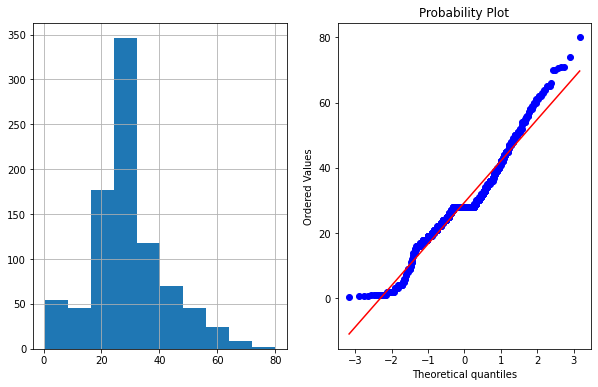

In [34]:
import scipy.stats as stat
import pylab

def plot_data(df, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

plot_data(df, 'Age')

# As all the points are falling in the same line, so yeah it is normally distributed.

a) Logarithmic Transformation

    Works well when data is Right or Left Sqewed.

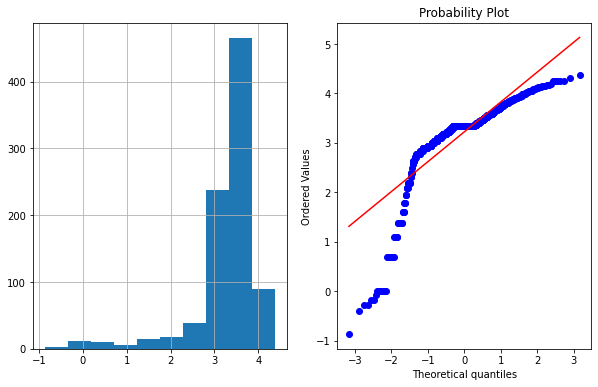

In [35]:
df['Age_log'] = np.log(df['Age'])
plot_data(df, 'Age_log')

b) Reciprocal Transformation

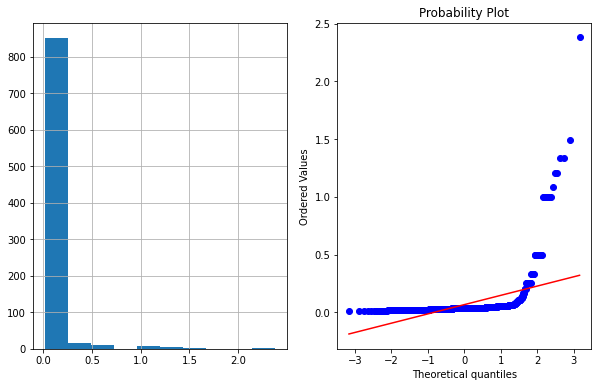

In [38]:
df['Age_reciprocal'] = 1/df['Age']
plot_data(df, 'Age_reciprocal')

c) Square Root Transformation

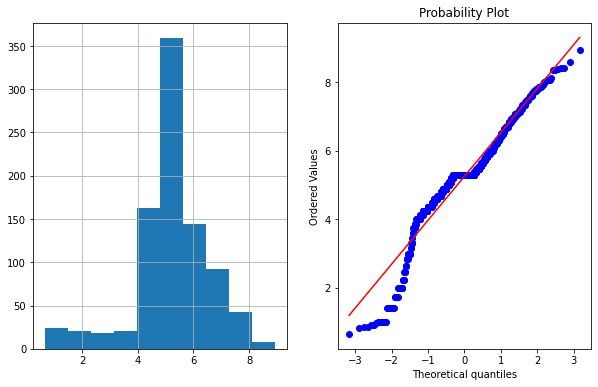

In [39]:
df['Age_sq'] = df['Age']**(1/2)
plot_data(df, 'Age_sq')

d) Exponential Transformation

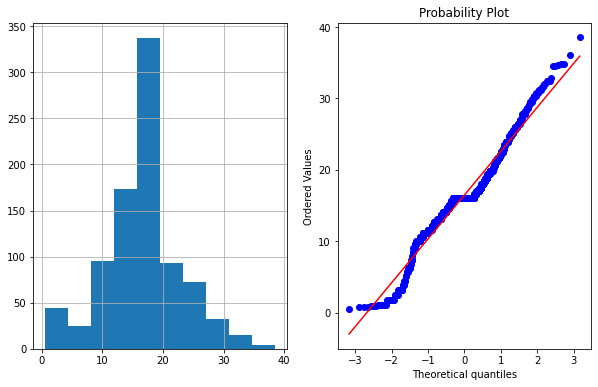

In [40]:
df['Age_exp'] = df['Age']**(1/1.2)
plot_data(df, 'Age_exp')

e) Box Cox Transformation

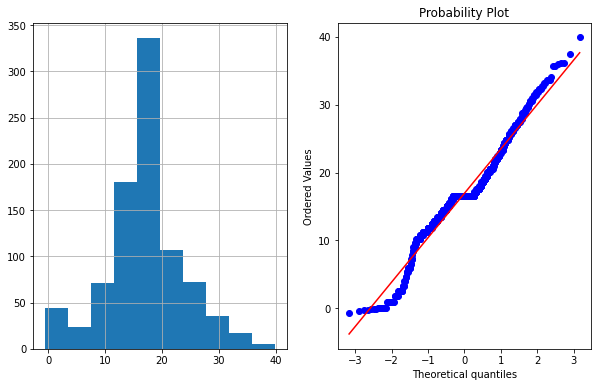

In [42]:
df['Age_bc'], params = stat.boxcox(df['Age'])
plot_data(df, 'Age_bc')

###**Handling Imbalanced Dataset**

In [ ]:
!pip install imbalanced-learn

In [48]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [49]:
df = pd.read_csv("/content/MyDrive/MyDrive/datasets/creditcard.csv")
df.shape

(284807, 31)

In [51]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [54]:
# Diving into independent and dependtent features.

X = df.iloc[:, :-1]
y = df['Class']

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV, train_test_split

####Without applying any imbalance technique
    When dataset is imbalanced, don't rely on accuracy metric, check precision, f1-score and recall.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [59]:
model1 = LogisticRegression()

grid = {
    'C': 10.0**np.arange(-2, 3),
    'penalty': ['l1', 'l2']
}

cv = KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
clf = GridSearchCV(model1, grid, cv=cv, scoring='f1_macro', n_jobs=-1)
clf.fit(X_train, y_train)

In [63]:
y_preds = clf.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[85248    30]
 [   52   113]]
0.9990402958697612
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.79      0.68      0.73       165

    accuracy                           1.00     85443
   macro avg       0.89      0.84      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [65]:
class_weight = dict({0:1, 1:100})
clf2 = RandomForestClassifier(class_weight=class_weight)
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
y_preds = clf2.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[85271     7]
 [   42   123]]
0.9994265182636377
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.95      0.75      0.83       165

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



####1) Undersampling 
    Can be used when data is really less.
    Not recommended to use becasue it reduces the data.
    Reduce the points of maximum labels.

In [69]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [70]:
Counter(y_train)

Counter({0: 199037, 1: 327})

In [71]:
ns = NearMiss(0.8) # 80% of 327 + 327
X_train_ns, y_train_ns = ns.fit_sample(X_train, y_train)

Counter(y_train_ns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 408, 1: 327})

In [75]:
clf3 = RandomForestClassifier()
clf3.fit(X_train_ns, y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
y_preds = clf3.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[74556 10722]
 [   16   149]]
0.8743255737743291
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     85278
           1       0.01      0.90      0.03       165

    accuracy                           0.87     85443
   macro avg       0.51      0.89      0.48     85443
weighted avg       1.00      0.87      0.93     85443



####2) Oversampling

In [77]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os = RandomOverSampler(0.5)
X_train_os, y_train_os = os.fit_sample(X_train, y_train)
Counter(y_train_os)

In [80]:
clf4 = RandomForestClassifier()
clf4.fit(X_train_os, y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
y_preds = clf4.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[85270     8]
 [   42   123]]
0.9994148145547324
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.94      0.75      0.83       165

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



####3) SMOTETomek

In [83]:
from imblearn.combine import SMOTETomek

In [ ]:
sm = SMOTETomek(0.5)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [87]:
Counter(y_train_sm)

Counter({0: 198309, 1: 98790})

In [85]:
clf5 = RandomForestClassifier()
clf5.fit(X_train_os, y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
y_preds = clf5.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[85270     8]
 [   43   122]]
0.999403110845827
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.94      0.74      0.83       165

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



####4) Ensemble Technique

In [88]:
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
easy = EasyEnsembleClassifier()
easy.fit(X_train, y_train)

In [90]:
y_preds = easy.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[82403  2875]
 [   18   147]]
0.9661411701368163
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85278
           1       0.05      0.89      0.09       165

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



####**OUTLIERS AND IT'S IMPACT**

    Outliers are basically those data points which are abnormal/different from other data points in a dataset.

    ML algorithms :=
    1) Naive Bayes Classifier => Not sensitive.
    2) SVM => Not sensitive.
    3) Decision Tree Regression or Classifier => Not sensivitve.
    4) Ensemble (RF, XGBoost, GB) => Not sensitive.
    5) KNN => Not sensivtive.
    6) Linear Regression => Sensitive.
    7) Logistic Regression => Sensitive.
    8) KMeans => Sensitive.
    9) Hierarichal => Sensitive.
    11) DBScan => Sensitive.
    12) PCA => Sensitive.
    13) Neural Networks => Sensitive.

In [2]:
df = pd.read_csv("/content/titanic.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


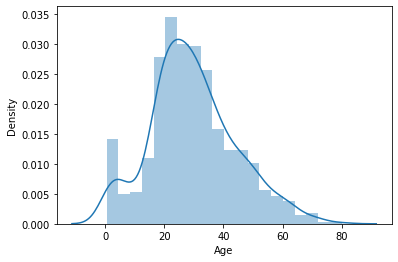

In [5]:
sns.distplot(df['Age'].dropna())

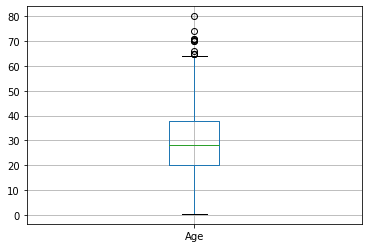

In [6]:
fig = df.boxplot(column='Age')

#### Handling Outliers for Gaussian Distribution.

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Assuming 'Age' follows a Gaussian Distribution we will calculate the boundaries which differentiate the outliers.

In [10]:
upper_bound = df['Age'].mean() + 3*df['Age'].std()
lower_bound = df['Age'].mean() - 3*df['Age'].std()

upper_bound, lower_bound

(73.27860964406095, -13.88037434994331)

#### Handling Outliers for Skewed Feature.

In [14]:
# Computing the IQR for calculating the boundaries.
# IQR = difference between 75 percentile and 25 percentile.

IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
IQR

23.0896

In [17]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)  # for extreme outliers, x by 3 instead of 1.5.
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)

lower_bridge, upper_bridge

(-61.358399999999996, 100.2688)

Removing the Outliers for Gaussian distributed feature.

In [18]:
data = df.copy()

In [20]:
data.loc[data['Age'] > upper_bound, 'Age'] = upper_bound

Removing the Outliers for Skewed feature.

In [21]:
data.loc[data['Fare'] > upper_bridge, 'Fare'] = upper_bridge

**ALL IMPORTANT FEATURE SELECTION TECHNIQUES**

1) USING CORRELATION MATRIX

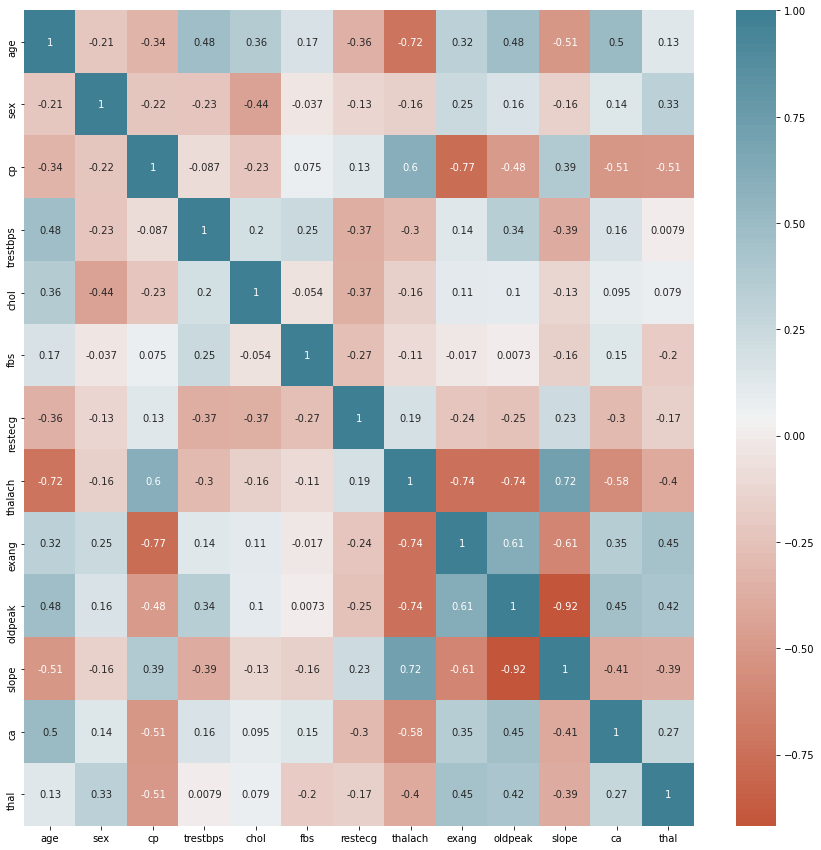

In [ ]:
# correlation matrix

corr_mat = train_df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(15, 15))
g = sns.heatmap(corr_mat[top_corr_features].corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200))

In [ ]:
# find and remove correlated features

threshold = 0.8

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(train_df.iloc[:,:-1],threshold)

set()

2) USING K SELECT BEST CHI^2 TEST

In [ ]:
# Select K best using Chi^2 test

ordered_rank_features = SelectKBest(score_func=chi2, k=13)
ordered_feature = ordered_rank_features.fit(train_df, y)

dfscores = pd.DataFrame(ordered_feature.scores_, columns=["Score"])
dfcolumns = pd.DataFrame(train_df.columns)

features_rank = pd.concat([dfcolumns, dfscores], axis=1)

features_rank.columns = ['Features','Score']

features_rank.nlargest(13, 'Score')

,Features,Score
7,thalach,188.320472
9,oldpeak,72.644253
11,ca,66.440765
2,cp,62.598098
8,exang,38.914377
4,chol,23.936394
0,age,23.286624
3,trestbps,14.823925
10,slope,9.804095
1,sex,7.576835


3) USING FEATURE IMPORTANCE - This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [ ]:
model = ExtraTreesClassifier()
model.fit(train_df, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

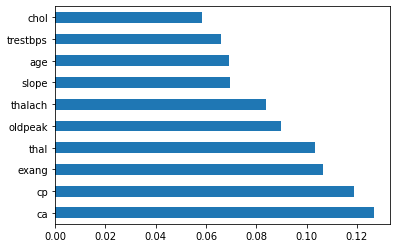

In [ ]:
ranked_features = pd.Series(model.feature_importances_, index=train_df.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

4) USING INFORMATION GAIN

In [ ]:
mutual_info = mutual_info_classif(train_df, y)

In [ ]:
mutual_data = pd.Series(mutual_info, index=train_df.columns)
mutual_data.sort_values(ascending=False)

cp          0.157512
ca          0.125396
thal        0.098919
exang       0.089696
slope       0.087677
oldpeak     0.085162
chol        0.083242
thalach     0.075302
sex         0.042916
restecg     0.004994
fbs         0.000000
trestbps    0.000000
age         0.000000
dtype: float64

**FINAL SELECTION OF FEATURES**

In [5]:
final_selected_features = ['ca', 'cp', 'exang', 'thal', 'oldpeak', 'thalach']

In [6]:
X = train_df[final_selected_features]

In [7]:
X.shape

(303, 6)

**ALL IMPORTATNT CROSS VALIDATION TECHNIQUES**

1) THE SIMPLEST - HOLDOUT VALIDATION APPROACH - TRAIN TEST SPLIT

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.15, random_state=101)

dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)
result = dtmodel.score(X_test, y_test)
print(result)

# 1 disadvantage of this approach is that the data is splitted based on the random_state.

0.8043478260869565


2) K FOLD CROSS VALIDATION - we do N different splits and fit our model on these N splits and later take mean of the accuracies.

In [18]:
from sklearn.model_selection import KFold, cross_val_score

dtmodel = DecisionTreeClassifier()

kfold_validations = KFold(10)

results = cross_val_score(dtmodel, X.values, y, cv=kfold_validations)
print(results)
print(np.mean(results))

[0.67741935 0.74193548 0.77419355 0.53333333 0.76666667 0.8
 0.76666667 0.8        0.63333333 0.63333333]
0.7126881720430107


3) STRATIFIED K FOLD CROSS VALIDATION - can be used for an imbalanced dataset

In [20]:
from sklearn.model_selection import StratifiedKFold

stratified_kfold_validation = StratifiedKFold(n_splits=5)

dtmodel = DecisionTreeClassifier()

results = cross_val_score(dtmodel, X.values, y, cv=stratified_kfold_validation)
print(results)
print(np.mean(results))

[0.75409836 0.81967213 0.80327869 0.68333333 0.7       ]
0.7520765027322405


4) LEAVE ONE OUT CROSS VALIDATION - from the entire dataset we pickout 1 or 'p' data randomly as test data and remaining all is train data, and we do this for all samples.

In [22]:
from sklearn.model_selection import LeaveOneOut

leaveOneOut_validation = LeaveOneOut()

results = cross_val_score(dtmodel, X.values, y, cv=leaveOneOut_validation)
print(np.mean(results))

0.759075907590759


5) REPEATED RANDOM TEST TRAIN SPLITS

This technique is a hybrid of traditional train-test splitting and the k-fold cross-validation method. In this technique, we create random splits of the data in the training-test set manner and then repeat the process of splitting and evaluating the algorithm multiple times, just like the cross-validation method.

In [23]:
from sklearn.model_selection import ShuffleSplit

ssplit=ShuffleSplit(n_splits=10,test_size=0.30)

results = cross_val_score(dtmodel, X.values, y, cv=ssplit)
print(np.mean(results))

0.7307692307692308


**MODEL SELECTION WITH HYPERPARAMETER OPTIMIZATION**

RANDOMFOREST

In [ ]:
# using random forest classifier

rfc = RandomForestClassifier(random_state=10) # ravel : from (n,m) => (n,)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
# random forest classifier accuracy:
y_preds = rfc.predict(X_test)
print("Accuracy : {:.2f}%".format(accuracy_score(y_test, y_preds)*100))

Accuracy : 78.26%


XGBOOST

In [ ]:
# using xgboost

# hyperparameter optimization

params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

clf = xgboost.XGBClassifier()

random_search = RandomizedSearchCV(
    clf, 
    param_distributions=params, 
    n_iter=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    cv=5, 
    verbose=3
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
score = cross_val_score(classifier, X_train, y_train, cv=10)
print(score.mean())

0.8250769230769232


In [ ]:
# xgboost classifier accuracy:
y_preds = classifier.predict(X_test)
print("Accuracy : {:.2f}%".format(accuracy_score(y_test, y_preds)*100))

Accuracy : 84.78%


In [ ]:
# saving trained model
filename = '/content/heart-disease.sav'
pickle.dump(classifier, open(filename, 'wb'))